In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("grocery_data.csv")

In [73]:
# df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Order ID,Customer Name,Category,Sub Category,Order Date,Sales,Discount,Profit
0,678,OD3473,Sheeba,Bakery,Breads & Buns,01-01-2022,2737,0.18,1047.9500
1,139,OD849,Adavan,Oil & Masala,Masalas,01-01-2022,453,0.14,22.6500
2,689,OD3544,Vinne,Snacks,Cookies,01-01-2022,1970,0.33,544.4928
3,691,OD3562,Sabeela,Food Grains,Atta & Flour,01-01-2022,2332,0.31,839.5200
4,358,OD1890,Vidya,Beverages,Soft Drinks,01-01-2022,2741,0.25,832.0700


In [74]:
df.drop([ "Customer Name", "Order ID"], axis=1, inplace=True)
df

,Unnamed: 0,Category,Sub Category,Order Date,Sales,Discount,Profit
0,678,Bakery,Breads & Buns,01-01-2022,2737,0.18,1047.95000
1,139,Oil & Masala,Masalas,01-01-2022,453,0.14,22.65000
2,689,Snacks,Cookies,01-01-2022,1970,0.33,544.49280
3,691,Food Grains,Atta & Flour,01-01-2022,2332,0.31,839.52000
4,358,Beverages,Soft Drinks,01-01-2022,2741,0.25,832.07000
...,...,...,...,...,...,...,...
1975,1500,Oil & Masala,Edible Oil & Ghee,12/30/2022,97,0.20,4.85000
1976,118,"Eggs, Meat & Fish",Eggs,12/30/2022,456,0.31,76.30848
1977,922,Beverages,Soft Drinks,12/30/2022,2090,0.19,194.68800
1978,1499,Food Grains,Organic Staples,12/30/2022,548,0.25,164.40000


In [75]:
dsale={}
ddisc={}
dprof={}
for cat,sale,disc,profit in df.loc[:,["Category","Sales","Discount","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        ddisc[cat] += disc
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        ddisc[cat]=disc
        dprof[cat]=profit
print(dsale)
print(ddisc)
print(dprof)

{'Bakery': 584301, 'Oil & Masala': 150531, 'Snacks': 636156, 'Food Grains': 409364, 'Beverages': 529478, 'Eggs, Meat & Fish': 129502, 'Fruits & Veggies': 446201}
{'Bakery': 62.25000000000001, 'Oil & Masala': 58.77, 'Snacks': 67.02000000000002, 'Food Grains': 62.54000000000001, 'Beverages': 63.81000000000004, 'Eggs, Meat & Fish': 65.05000000000003, 'Fruits & Veggies': 65.64999999999999}
{'Bakery': 166484.4871200001, 'Oil & Masala': 7526.550000000002, 'Snacks': 184195.42759999982, 'Food Grains': 103415.46000000005, 'Beverages': 138572.63279999993, 'Eggs, Meat & Fish': 60888.65312, 'Fruits & Veggies': 114177.23000000003}


In [76]:
total_revenue=0
for k in dsale:
    total_revenue += dsale[k]

print(f"The total revenue made in the year 2022 is {total_revenue}")

The total revenue made in the year 2022 is 2885533


In [77]:
total_profit=0
for k in dprof:
    total_profit += dprof[k]

print(f"The total profit made in the year 2022 is {total_profit}")

The total profit made in the year 2022 is 775260.4406399999


Profit percentage = total_revenue/total_expenditure *100
total_expenditure = Total_revenue-Total_profit

In [104]:
total_expenditure = total_revenue-total_profit

profit_percentage = (total_profit/total_expenditure)*100

print(f"Total percentage profit of the year 2022 is {profit_percentage}")

Total percentage profit of the year 2022 is 36.737455415480525


Text(0.5, 1.0, 'Category wise Profit Vs Sales')

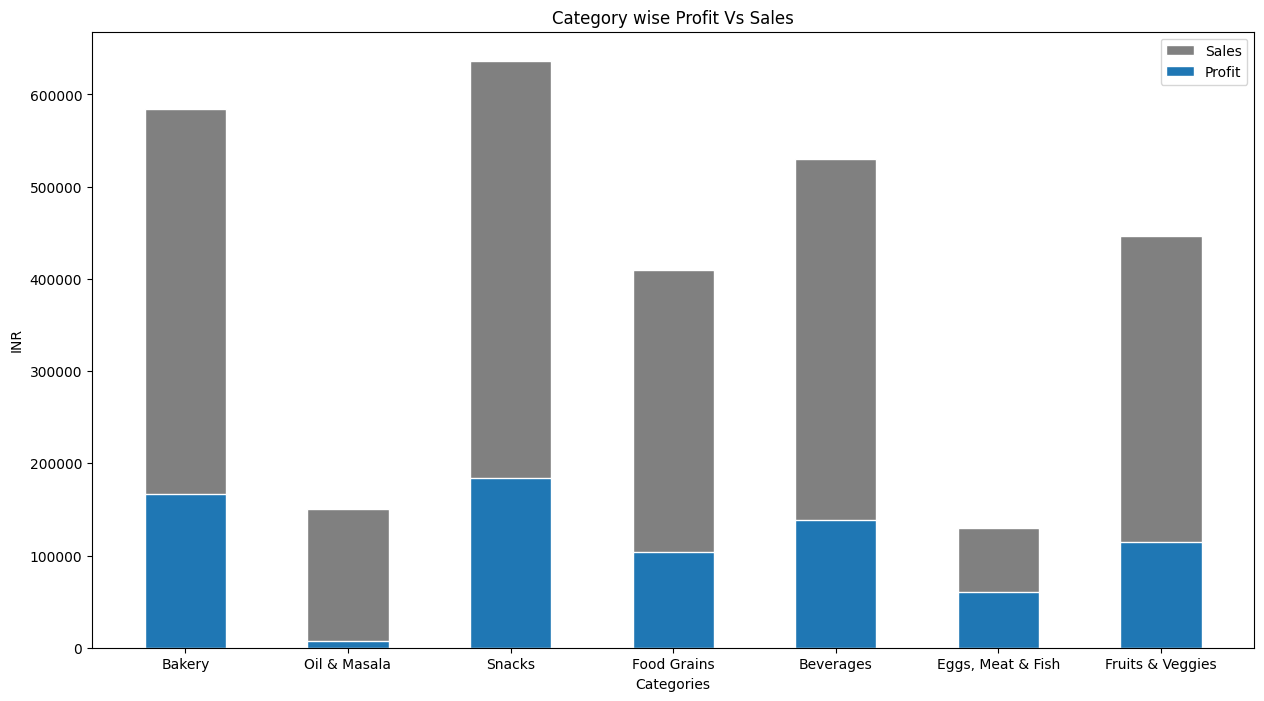

In [78]:
fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)


ax.bar(dsale.keys(), dsale.values(), width=0.5, edgecolor="white", linewidth=1,color='grey')
ax.bar(dprof.keys(), dprof.values(), width=0.5, edgecolor="white", linewidth=1)
plt.xlabel("Categories")
plt.ylabel("INR")
plt.legend(['Sales', 'Profit', ])
plt.title("Category wise Profit Vs Sales")

Text(0.5, 1.0, 'Sales Distribution')

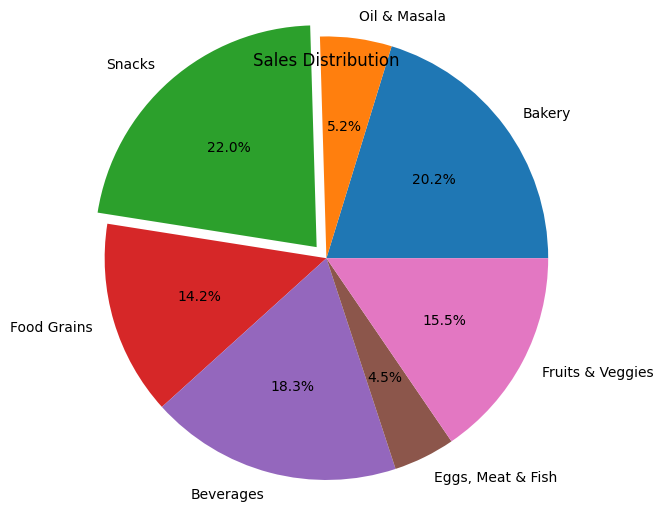

In [79]:
plt.pie(dsale.values(),radius=1.5,labels=dprof.keys(),autopct='%1.1f%%',explode=[0,0,0.1,0,0,0,0],startangle=0)
plt.title("Sales Distribution")


Text(0.5, 1.0, 'Profit Distribution')

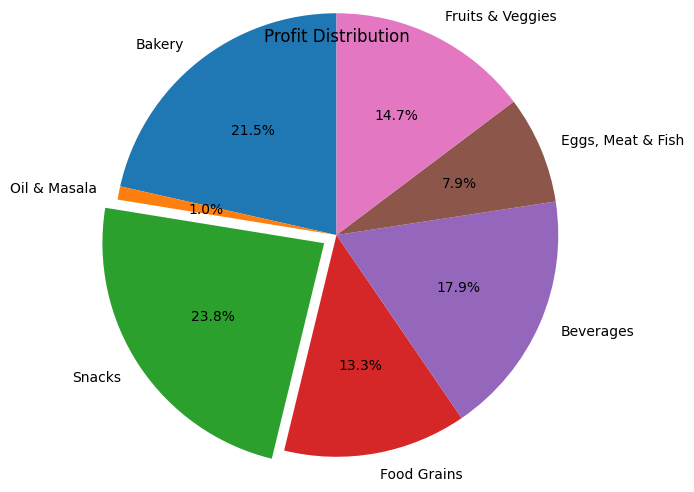

In [80]:
plt.pie(dprof.values(),radius=1.5,labels=dprof.keys(),autopct='%1.1f%%',explode=[0,0,0.1,0,0,0,0],startangle=90)
plt.title("Profit Distribution")

<BarContainer object of 7 artists>

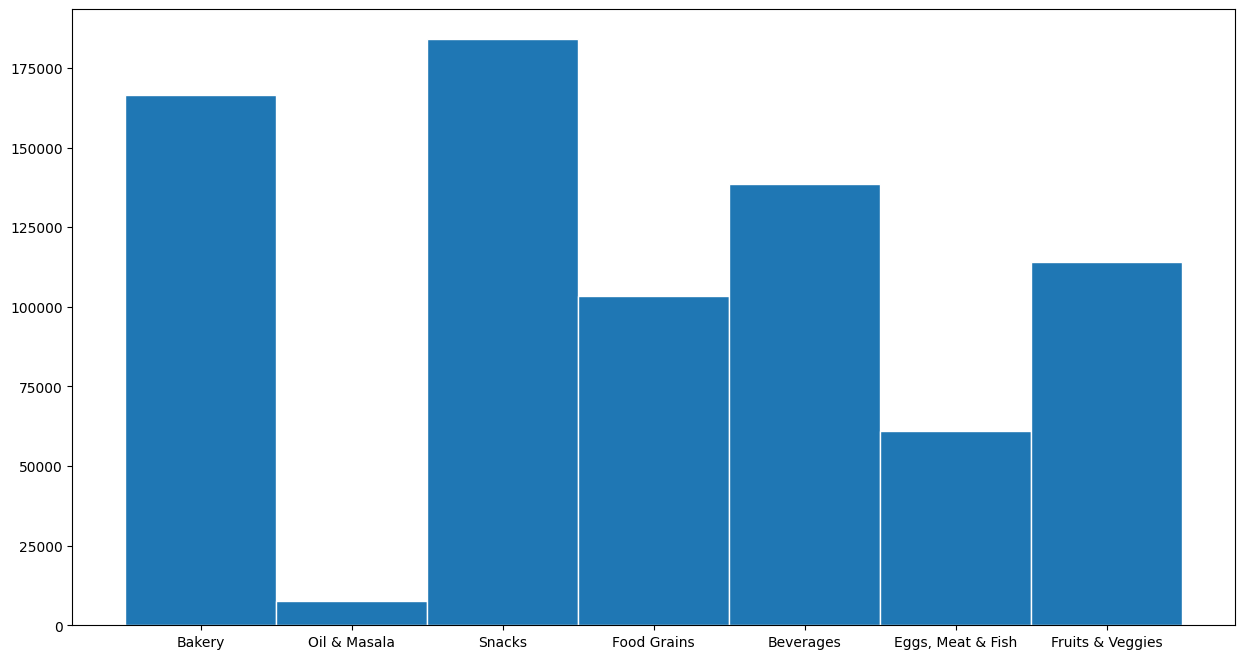

In [81]:
fig2,az = plt.subplots()
fig2.set_figwidth(15)
fig2.set_figheight(8)

az.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

In [82]:
monthly_data = []
prev=0
for i in range(1,len(df)):
    if df["Order Date"][i][:2]!=df["Order Date"][i-1][:2]:
        monthly_data.append(df[prev:i])
        prev=i
monthly_data.append(df[prev:1980])
monthly_data[11]

,Unnamed: 0,Category,Sub Category,Order Date,Sales,Discount,Profit
1518,342,Bakery,Breads & Buns,12-01-2022,2673,0.28,942.63000
1519,110,Fruits & Veggies,Fresh Fruits,12-01-2022,1483,0.29,281.77000
1520,109,Food Grains,Atta & Flour,12-01-2022,750,0.16,165.00000
1521,108,Beverages,Soft Drinks,12-01-2022,1222,0.13,142.04160
1522,1353,Bakery,Breads & Buns,12-01-2022,2706,0.32,400.30848
...,...,...,...,...,...,...,...
1975,1500,Oil & Masala,Edible Oil & Ghee,12/30/2022,97,0.20,4.85000
1976,118,"Eggs, Meat & Fish",Eggs,12/30/2022,456,0.31,76.30848
1977,922,Beverages,Soft Drinks,12/30/2022,2090,0.19,194.68800
1978,1499,Food Grains,Organic Staples,12/30/2022,548,0.25,164.40000


In [83]:
monthly_data[2]

,Unnamed: 0,Category,Sub Category,Order Date,Sales,Discount,Profit
74,770,Snacks,Cookies,03-02-2022,2911,0.24,923.97000
75,1622,Snacks,Chocolates,03-02-2022,2330,0.31,149.47200
76,1257,Food Grains,Atta & Flour,03-02-2022,765,0.21,198.90000
77,1501,Bakery,Breads & Buns,03-02-2022,1323,0.23,487.24416
78,1404,Oil & Masala,Edible Oil & Ghee,03-02-2022,1579,0.18,78.95000
...,...,...,...,...,...,...,...
141,1964,Snacks,Noodles,03-11-2022,2687,0.13,540.95040
142,1957,"Eggs, Meat & Fish",Chicken,03-11-2022,593,0.13,128.52224
143,798,Bakery,Biscuits,03-12-2022,2631,0.30,280.76544
144,1477,Fruits & Veggies,Organic Vegetables,03-12-2022,1961,0.13,196.10000


In [84]:
monthly_data[0].to_csv("january.csv")

In [85]:
monthly_data[1].to_csv("february.csv")
monthly_data[2].to_csv("march.csv")
monthly_data[3].to_csv("april.csv")
monthly_data[4].to_csv("may.csv")
monthly_data[5].to_csv("june.csv")
monthly_data[6].to_csv("july.csv")
monthly_data[7].to_csv("august.csv")
monthly_data[8].to_csv("september.csv")
monthly_data[9].to_csv("october.csv")
monthly_data[10].to_csv("november.csv")
monthly_data[11].to_csv("december.csv")

In [86]:
jan = pd.read_csv("january.csv", index_col=0)
feb = pd.read_csv("february.csv", index_col=0)
mar = pd.read_csv("march.csv", index_col=0)
apr = pd.read_csv("april.csv", index_col=0)
may = pd.read_csv("may.csv", index_col=0)
jun = pd.read_csv("june.csv", index_col=0)
jul = pd.read_csv("july.csv", index_col=0)
aug = pd.read_csv("august.csv", index_col=0)
sep = pd.read_csv("september.csv", index_col=0)
oct = pd.read_csv("october.csv", index_col=0)
nov = pd.read_csv("november.csv", index_col=0)
dec = pd.read_csv("december.csv", index_col=0)

Text(0.5, 1.0, 'January')

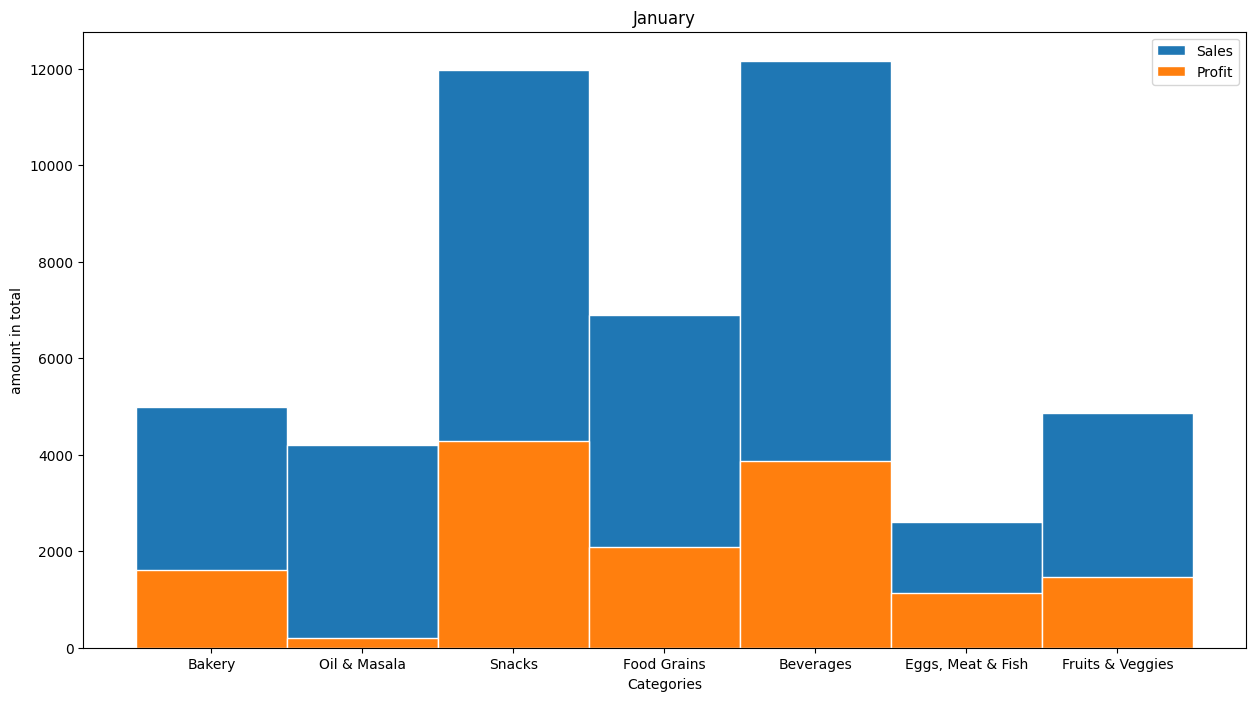

In [87]:
dsale={}
dprof={}
for cat,sale,profit in jan.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("January")

Text(0.5, 1.0, 'February')

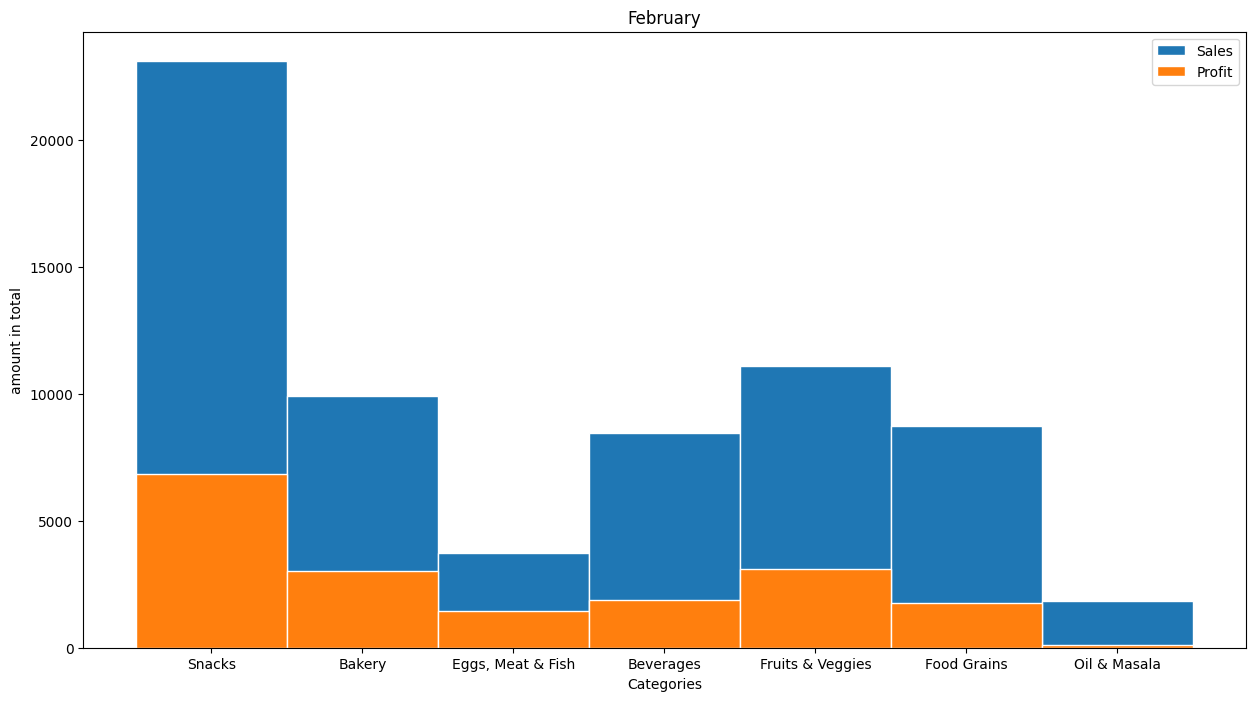

In [88]:
dsale={}
dprof={}
for cat,sale,profit in feb.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("February")

Text(0.5, 1.0, 'March')

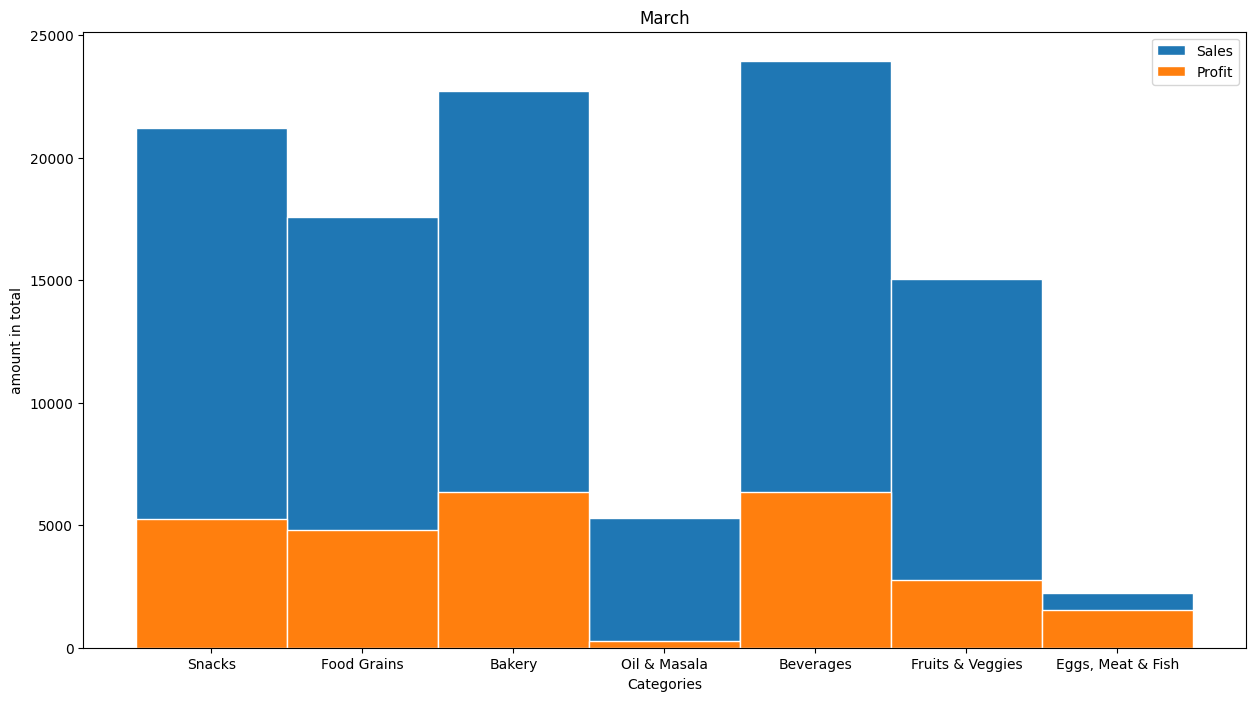

In [89]:
dsale={}
dprof={}
for cat,sale,profit in mar.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("March")

Text(0.5, 1.0, 'April')

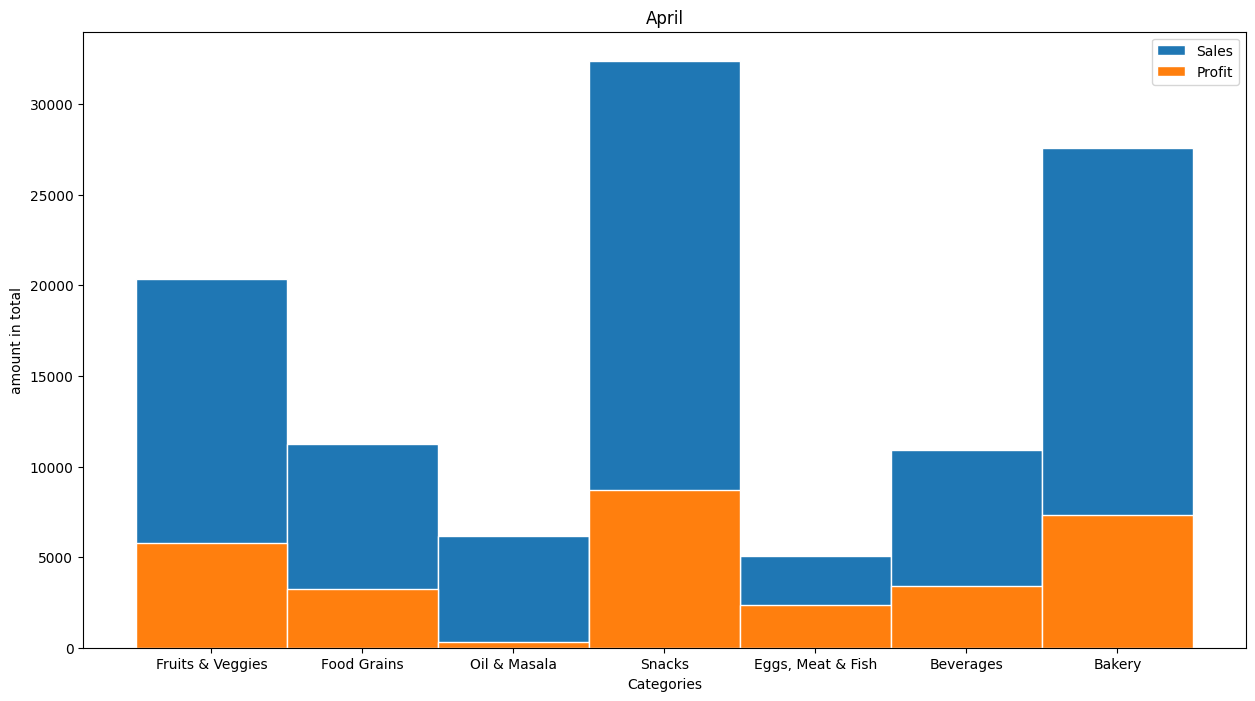

In [90]:
dsale={}
dprof={}
for cat,sale,profit in apr.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("April")

Text(0.5, 1.0, 'May')

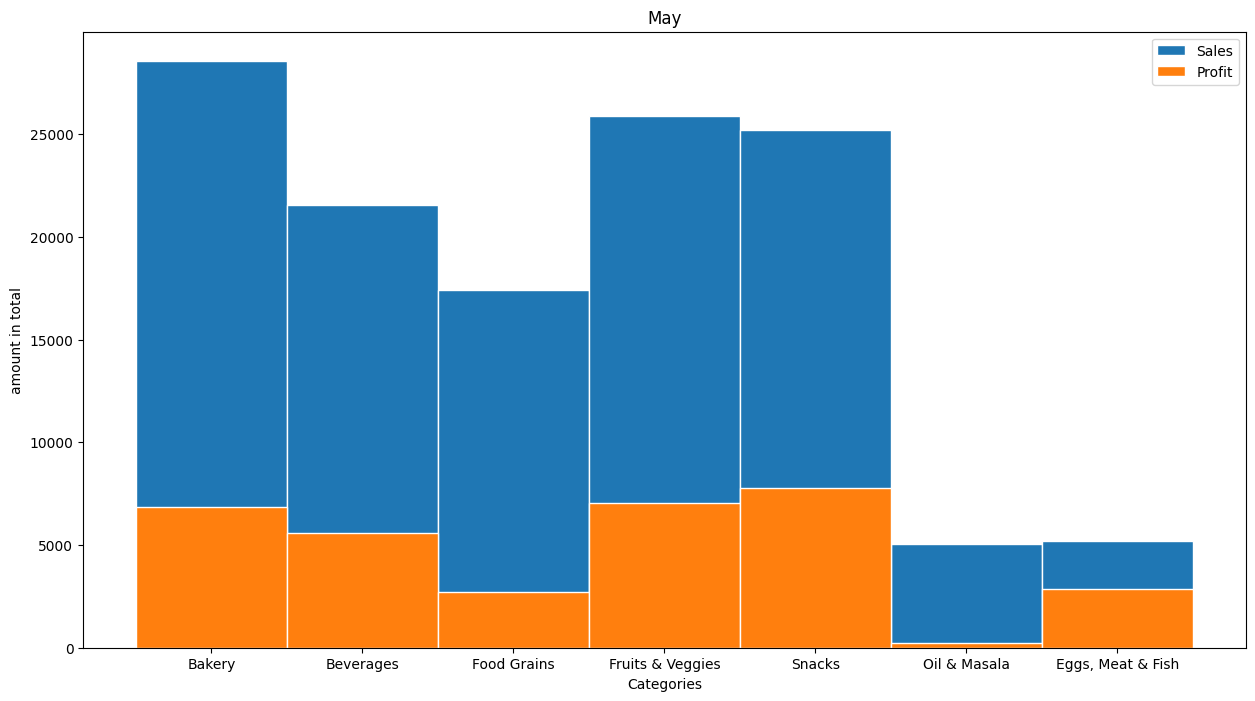

In [91]:
dsale={}
dprof={}
for cat,sale,profit in may.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("May")

Text(0.5, 1.0, 'June')

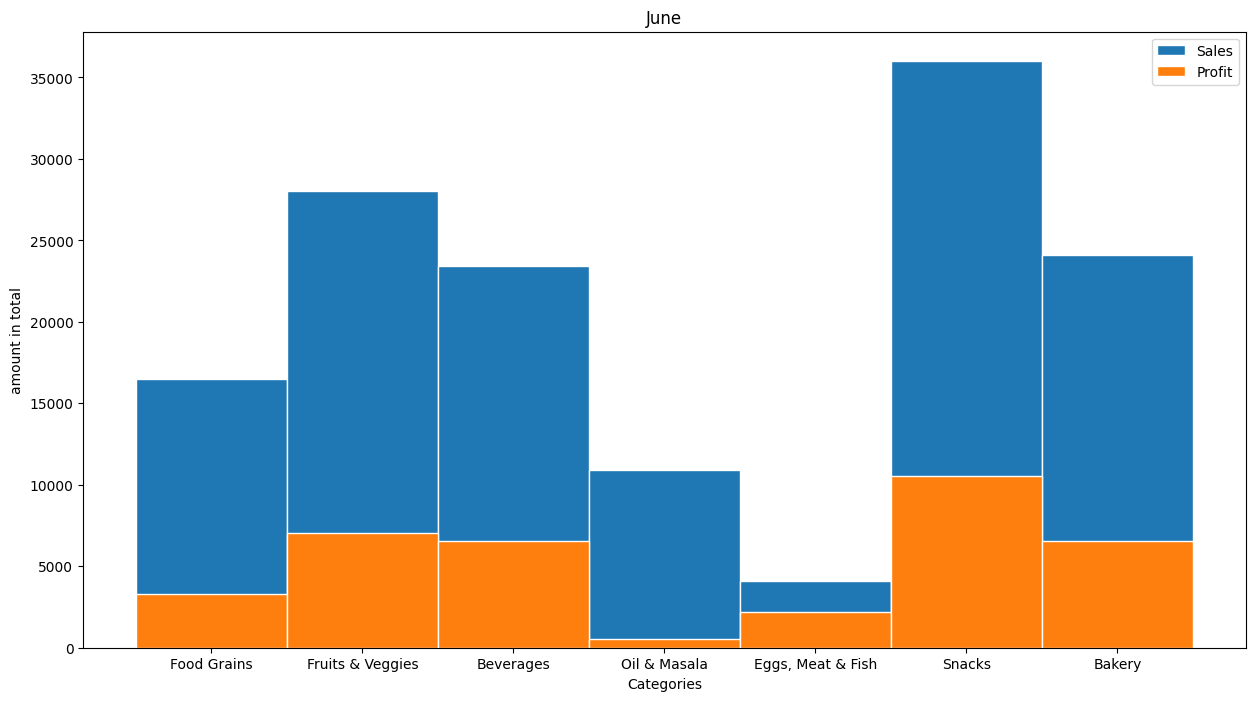

In [92]:
dsale={}
dprof={}
for cat,sale,profit in jun.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("June")

Text(0.5, 1.0, 'July')

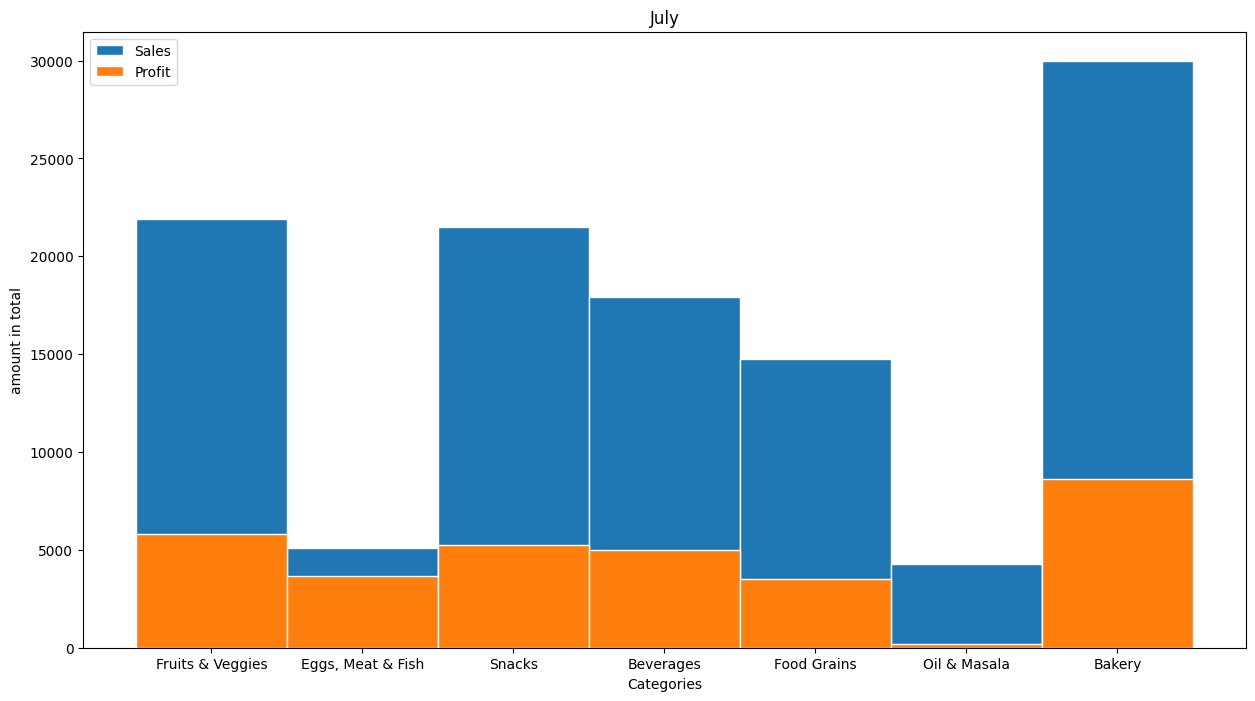

In [93]:
dsale={}
dprof={}
for cat,sale,profit in jul.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("July")

Text(0.5, 1.0, 'August')

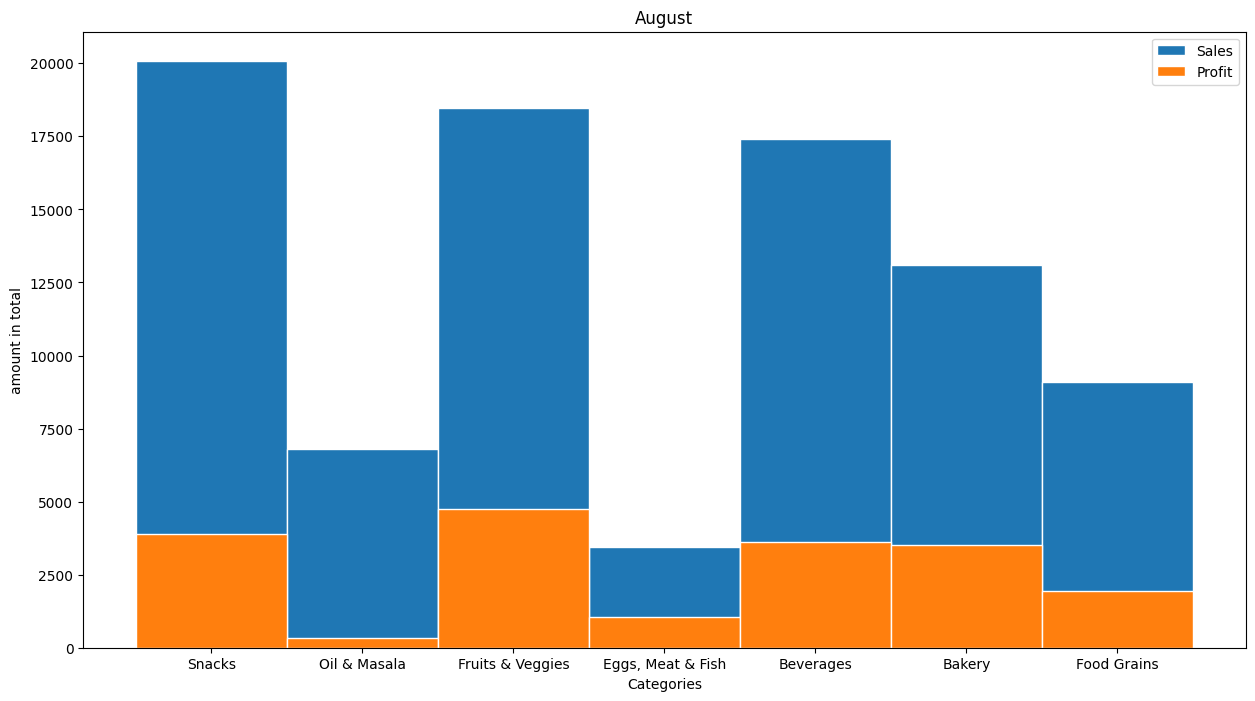

In [94]:
dsale={}
dprof={}
for cat,sale,profit in aug.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("August")

Text(0.5, 1.0, 'September')

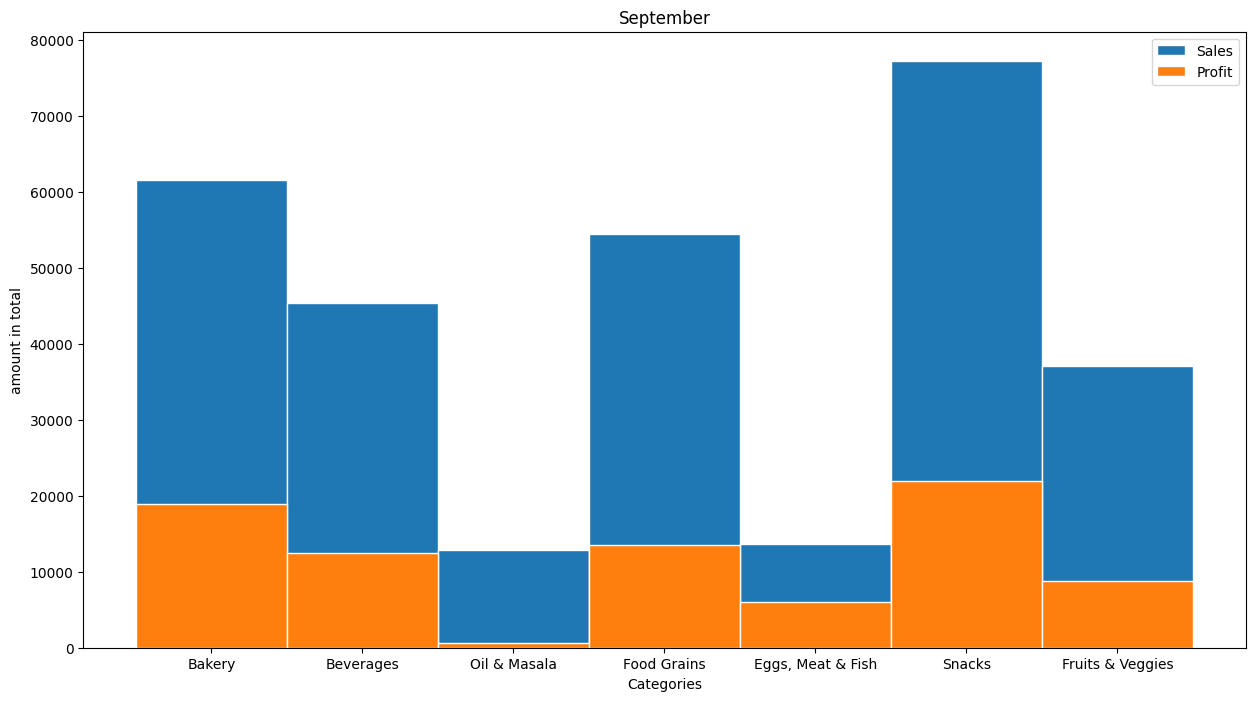

In [95]:
dsale={}
dprof={}
for cat,sale,profit in sep.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("September")

Text(0.5, 1.0, 'October')

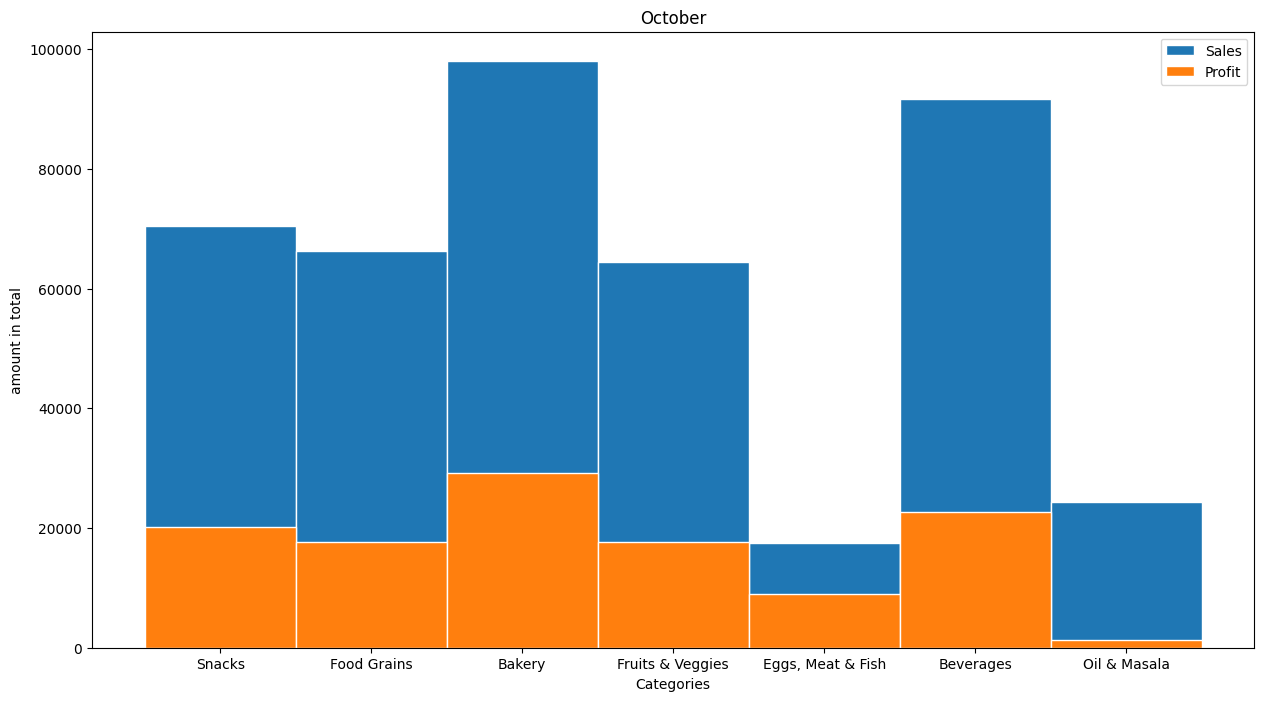

In [96]:
dsale={}
dprof={}
for cat,sale,profit in oct.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("October")

Text(0.5, 1.0, 'November')

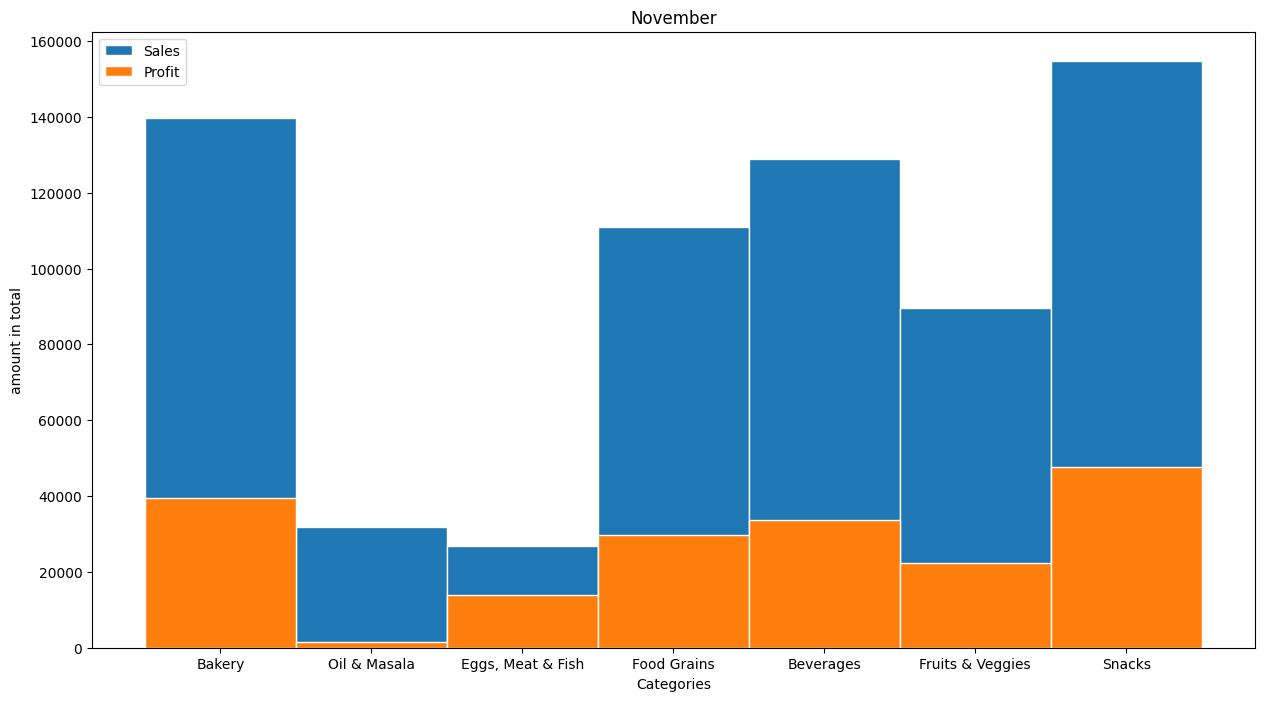

In [97]:
dsale={}
dprof={}
for cat,sale,profit in nov.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("November")

Text(0.5, 1.0, 'December')

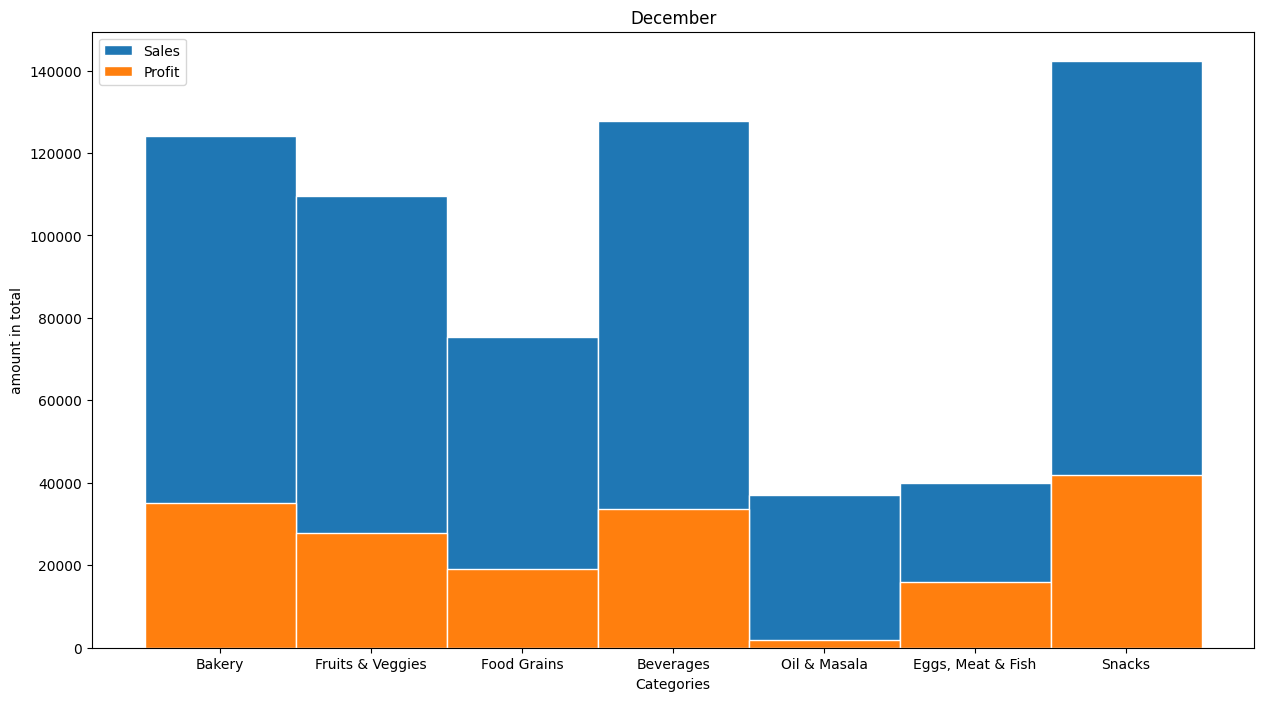

In [98]:
dsale={}
dprof={}
for cat,sale,profit in dec.loc[:,["Category","Sales","Profit"]].values:
    if cat in dsale.keys():
        dsale[cat] += sale
        dprof[cat] += profit
    else:
        dsale[cat]=sale
        dprof[cat]=profit

fig1,ay = plt.subplots()
fig1.set_figwidth(15)
fig1.set_figheight(8)

ay.bar(dsale.keys(), dsale.values(),  width=1, edgecolor="white", linewidth=1)
ay.bar(dprof.keys(), dprof.values(),  width=1, edgecolor="white", linewidth=1)

plt.xlabel("Categories")
plt.ylabel("amount in total")
plt.legend(['Sales','Profit'])
plt.title("December")

In [107]:
monthly_data[0]

,Unnamed: 0,Category,Sub Category,Order Date,Sales,Discount,Profit
0,678,Bakery,Breads & Buns,01-01-2022,2737,0.18,1047.95000
1,139,Oil & Masala,Masalas,01-01-2022,453,0.14,22.65000
2,689,Snacks,Cookies,01-01-2022,1970,0.33,544.49280
3,691,Food Grains,Atta & Flour,01-01-2022,2332,0.31,839.52000
4,358,Beverages,Soft Drinks,01-01-2022,2741,0.25,832.07000
5,667,"Eggs, Meat & Fish",Chicken,01-01-2022,1045,0.18,324.92000
6,660,Fruits & Veggies,Fresh Vegetables,01-01-2022,2193,0.27,592.11000
7,288,Beverages,Soft Drinks,01-01-2022,1983,0.28,801.54000
8,276,Oil & Masala,Edible Oil & Ghee,01-01-2022,612,0.20,30.60000
9,1710,Snacks,Cookies,01-01-2022,2645,0.29,1179.35000


In [119]:
categories = [cat for cat in monthly_data[0].Category.unique()]
categories

['Bakery',
 'Oil & Masala',
 'Snacks',
 'Food Grains',
 'Beverages',
 'Eggs, Meat & Fish',
 'Fruits & Veggies']

In [123]:
yearly_map_sales = {}
yearly_map_profit = {}
for cat in categories:
    yearly_map_profit[cat] = [0]*12
    yearly_map_sales[cat] = [0]*12


i=0
for month in monthly_data:

    for cat,sale,profit in month.loc[:,["Category","Sales","Profit"]].values:
        yearly_map_sales[cat][i]+= sale
        yearly_map_profit[cat][i]+= profit
    i+=1

yearly_map_sales

{'Bakery': [4991,
  9903,
  22728,
  27560,
  28554,
  24123,
  29975,
  13098,
  61567,
  98007,
  139661,
  124134],
 'Oil & Masala': [4204,
  1834,
  5283,
  6176,
  5029,
  10897,
  4279,
  6794,
  12841,
  24368,
  31754,
  37072],
 'Snacks': [11968,
  23121,
  21233,
  32378,
  25204,
  36009,
  21471,
  20077,
  77251,
  70435,
  154703,
  142306],
 'Food Grains': [6898,
  8720,
  17566,
  11267,
  17399,
  16469,
  14731,
  9095,
  54498,
  66223,
  111063,
  75435],
 'Beverages': [12158,
  8468,
  23947,
  10933,
  21540,
  23414,
  17897,
  17396,
  45444,
  91597,
  128926,
  127758],
 'Eggs, Meat & Fish': [2608,
  3738,
  2243,
  5075,
  5182,
  4071,
  5101,
  3444,
  13594,
  17535,
  26834,
  40077],
 'Fruits & Veggies': [4872,
  11104,
  15060,
  20366,
  25869,
  28005,
  21930,
  18472,
  37088,
  64448,
  89514,
  109473]}

In [116]:
categories = yearly_map[0].keys()
categories

dict_keys(['Bakery', 'Oil & Masala', 'Snacks', 'Food Grains', 'Beverages', 'Eggs, Meat & Fish', 'Fruits & Veggies'])

Text(0, 0.5, 'Amount')

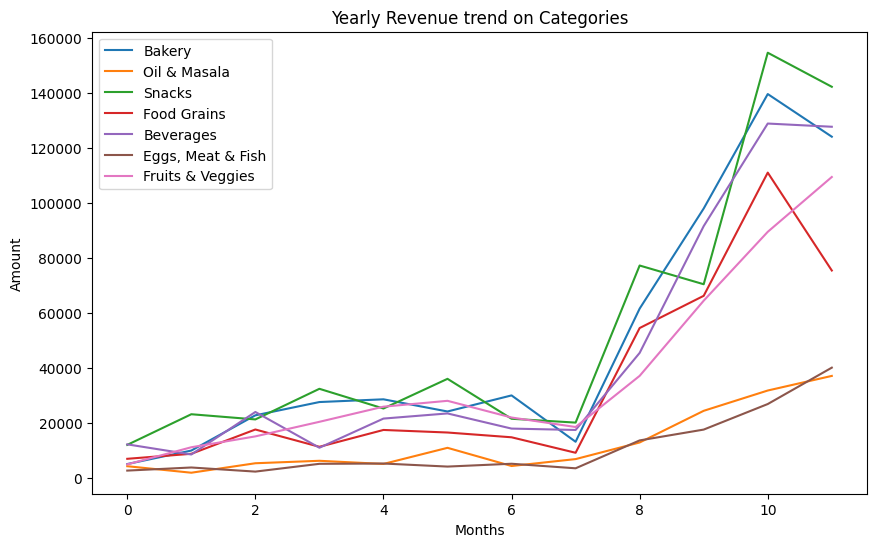

In [152]:
plt.figure(figsize=(10,6))
for cat in categories:
    plt.plot(yearly_map_sales[cat] , label=cat)

plt.legend()

plt.title("Yearly Revenue trend on Categories")
plt.xlabel('Months')
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

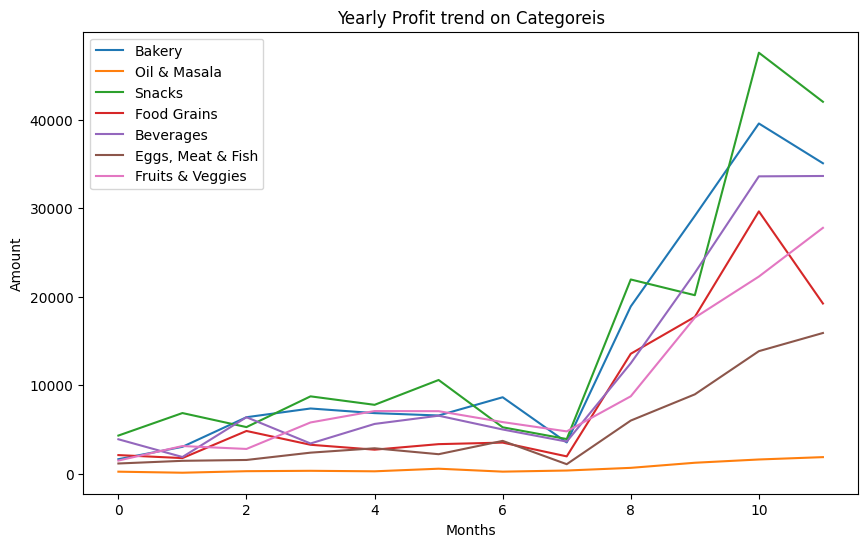

In [153]:
plt.figure(figsize=(10,6))
for cat in categories:
    plt.plot(yearly_map_profit[cat] , label=cat)

plt.legend()
plt.title("Yearly Profit trend on Categoreis")
plt.xlabel('Months')
plt.ylabel("Amount")